# Observation des données

## Lecture du fichier

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import csv
import string
import re
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import ipywidgets as widgets
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import seaborn as sns

In [ ]:
#Chargement de notre Dataframe
df = pd.read_csv("SMSSpamCollection.txt", sep = "\t", header=None, quoting=csv.QUOTE_NONE)

In [5]:
#Observation des 5 premières lignes de notre DataFrame
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


ham signifie non spam. Etymologie : ham signifie jambon en opposition à spam (marque de jambon en boîte connue pour ses publicités répétitives)

In [7]:
#Observation des 5 dernières lignes de notre DataFrame
df.tail()

,0,1
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...
5573,ham,Rofl. Its true to its name


In [8]:
#Changement des noms de colonne par Type message et Contenu. 
df = df.rename(columns = {0: "type_message", 1:"Contenu"})

In [136]:
#Information sur le type des messages
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   type_message      5574 non-null   object
 1   Contenu           5574 non-null   object
 2   longueur_message  5574 non-null   int64 
 3   nombre_mots       5574 non-null   int64 
 4   liste_mots        5574 non-null   object
 5   redondance_spam   5574 non-null   int64 
 6   chiffre_sms       5574 non-null   bool  
 7   Tot_chiffres      5574 non-null   int64 
 8   caracspec_sms     5574 non-null   int64 
dtypes: bool(1), int64(5), object(3)
memory usage: 353.9+ KB


<Axes: >

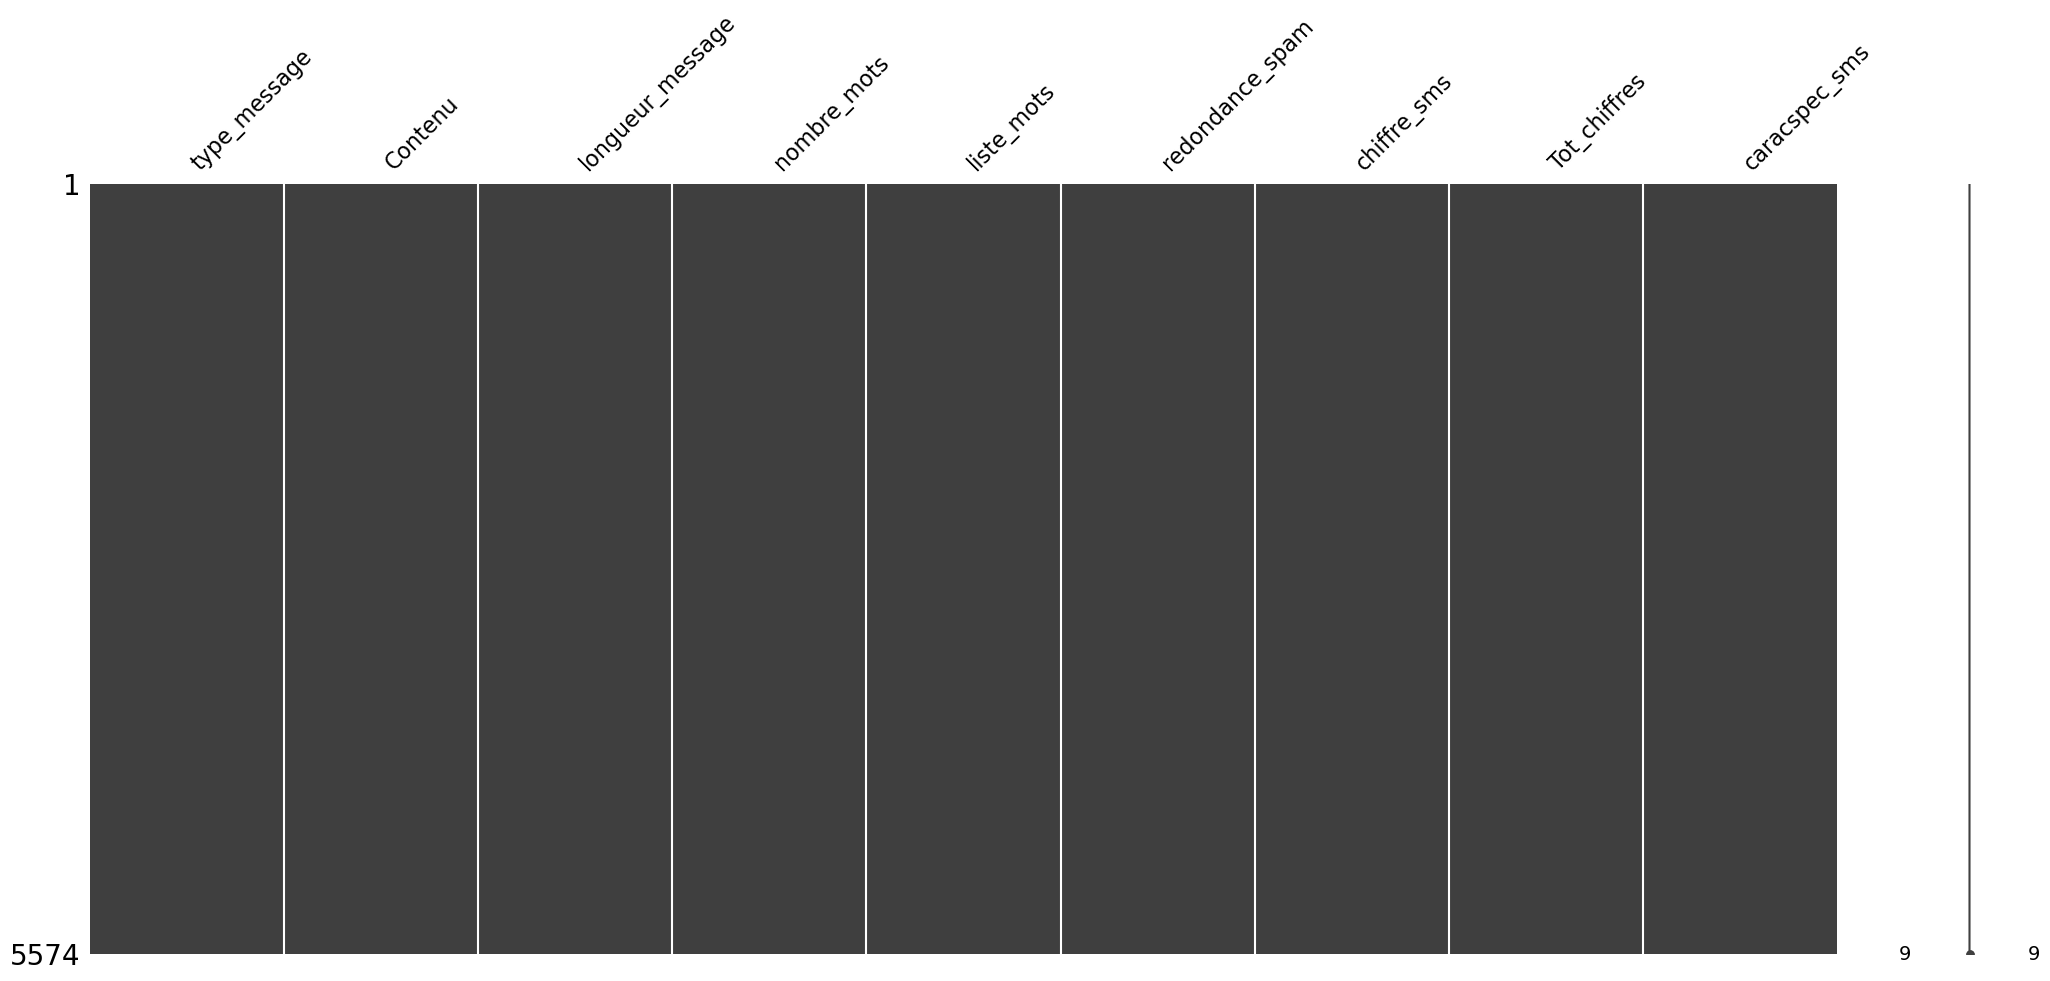

In [138]:
# recherche des valeurs manquantes
msno.matrix(df)

In [11]:
# Vérifier les valeurs en doublons
doublons = df.duplicated().sum()
print(f"Nombre de doublons dans le dataframe: {doublons}")

# Vérifier les valeurs manquantes
valeurs_manquantes = df.isnull().sum().sum()
print(f"Nombre de valeurs manquantes dans le dataframe: {valeurs_manquantes}")

Nombre de doublons dans le dataframe: 403
Nombre de valeurs manquantes dans le dataframe: 0


## Pourcentage des données spam/ham

In [140]:
#Calcul du pourcentage des messages corrects (ham)

totalmessage = df["type_message"].value_counts().sum()

hamsums = df[df['type_message']=='ham'].shape[0]

pourcentageh = round(hamsums / totalmessage *100 ,0)
print(f" Sur les 5571 messages, {hamsums} sont des messages corrects soit {pourcentageh} %")

 Sur les 5571 messages, 4827 sont des messages corrects soit 87.0 %


In [142]:
# Calcul du pourcentage des messages spams

spamsums = df[df['type_message']=='spam'].shape[0]

pourcentages = round(spamsums / totalmessage *100 ,0)
print(f" Sur les 5571 messages, {spamsums} sont des messages corrects soit {pourcentages} %")

 Sur les 5571 messages, 747 sont des messages corrects soit 13.0 %


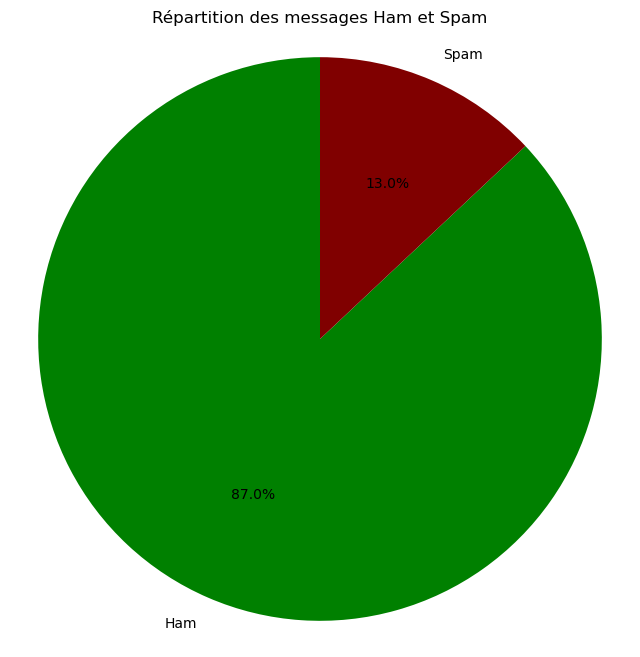

In [147]:
#Diagramme en camembert pour la répartition des messages ham et spam.

labels = ['Ham', 'Spam']
sizes = [pourcentageh, pourcentages]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors = ["green", "maroon"])
plt.title('Répartition des messages Ham et Spam')
plt.axis('equal')
plt.show()

### Forte différence entre les deux catégories. Cela s'explique assez facilement par le fait qu'il y a peu de spam via SMS (environ 3% (source : clicksend.com)). 

## Observation du nombre de caractères par message

In [151]:
# Création de la nouvelle colonne du nombre de caractères par SMS. 
df['longueur_message'] = df['Contenu'].apply(len)
df.head()

,type_message,Contenu,longueur_message,nombre_mots,liste_mots,redondance_spam,chiffre_sms,Tot_chiffres,caracspec_sms
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,"[Go, until, jurong, point,, crazy.., Available...",0,False,0,0
1,ham,Ok lar... Joking wif u oni...,29,6,"[Ok, lar..., Joking, wif, u, oni...]",0,False,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",1,True,25,1
3,ham,U dun say so early hor... U c already then say...,49,11,"[U, dun, say, so, early, hor..., U, c, already...",0,False,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,"[Nah, I, don't, think, he, goes, to, usf,, he,...",0,False,0,0


In [153]:
# Moyenne du nombre de caractères par message. 
df.groupby(["type_message"])["longueur_message"].mean()

type_message
ham      71.471929
spam    138.676037
Name: longueur_message, dtype: float64

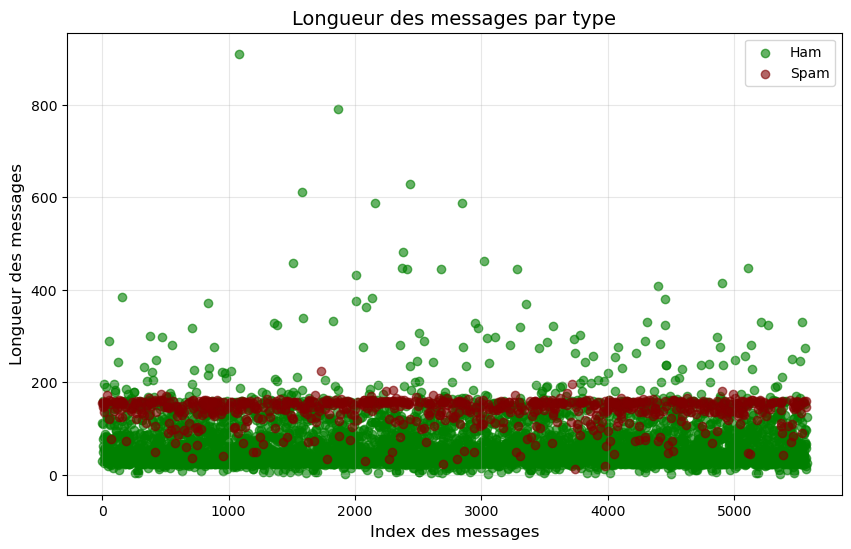

In [155]:
# Nuage de points représentant la distribution des messages selon le type. 

hamscatterplot = df[df['type_message']=='ham']
spamscatterplot = df[df['type_message']=='spam']

plt.figure(figsize=(10, 6))
plt.scatter(hamscatterplot.index, hamscatterplot["longueur_message"], color='green', label='Ham', alpha=0.6)
plt.scatter(spamscatterplot.index, spamscatterplot["longueur_message"], color='maroon', label='Spam', alpha=0.6)

plt.title("Longueur des messages par type", fontsize=14)
plt.xlabel("Index des messages", fontsize=12)
plt.ylabel("Longueur des messages", fontsize=12)
plt.legend()

plt.grid(True, alpha=0.3)
plt.show()

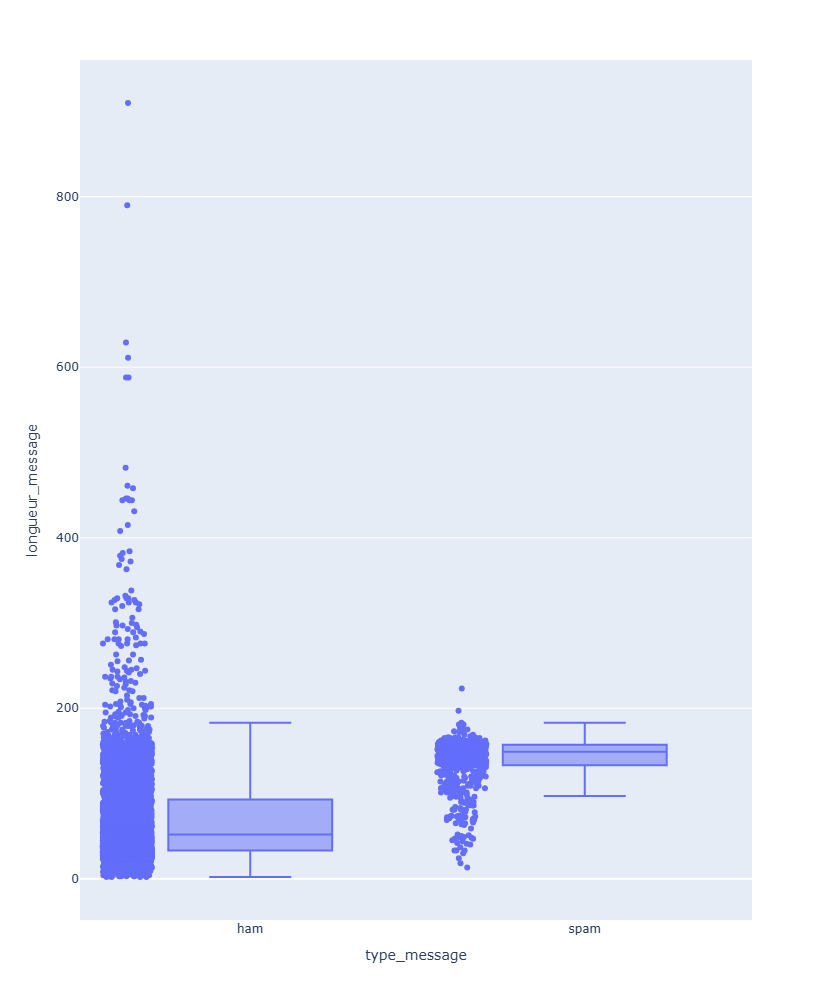

In [157]:
# Boîte à moustache pour une autre observation de la représentation des longueurs des messages selon le type. 
# Warning : Les diagrammes dynamiques ne sont pas disponible sur sur github. Veuillez ouvrir le fichier .py pour visualiser les diagrammes dynamiques. 
import plotly.express as px

fig = px.box(df, x="type_message", y="longueur_message", points = "all", width=1000, height=1000)
fig.show()

In [159]:
# Statistiques plus poussées sur les caractères. 

df.groupby(["type_message"])["longueur_message"].describe()

,count,mean,std,min,25%,50%,75%,max
type_message,,,,,,,,
ham,4827.0,71.471929,58.326643,2.0,33.0,52.0,93.0,910.0
spam,747.0,138.676037,28.871250,13.0,133.0,149.0,157.0,223.0


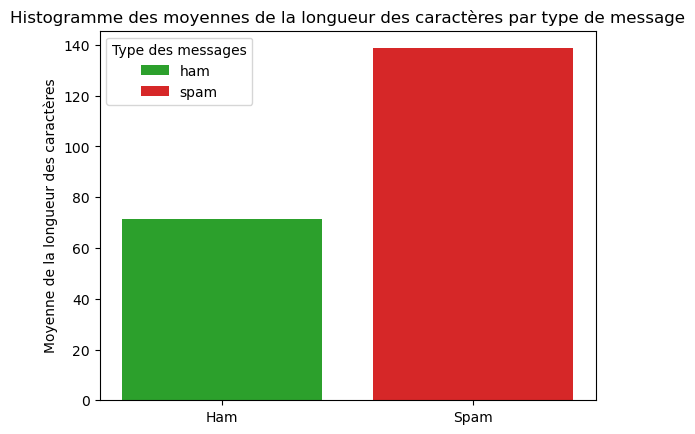

In [161]:
# Histogramme des moyennes de la longueur des caractères selon le type de message. 

fig, ax = plt.subplots()

Type_message = ['Ham', 'Spam']
counts = df.groupby(["type_message"])["longueur_message"].mean()
bar_labels = ['ham', 'spam']
bar_colors = ['tab:green', 'tab:red']

ax.bar(Type_message, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Moyenne de la longueur des caractères')
ax.set_title('Histogramme des moyennes de la longueur des caractères par type de message')
ax.legend(title='Type des messages')

plt.show()

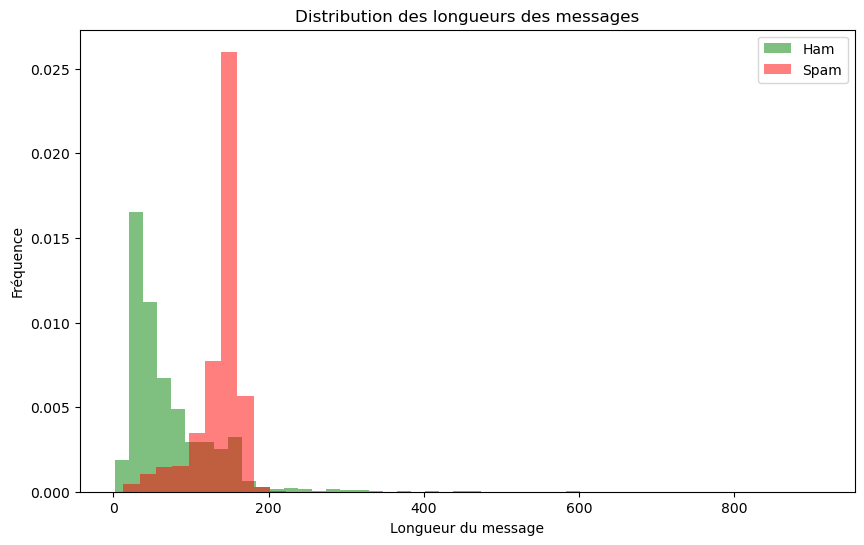

In [163]:
# Troisième graphique montrant la distributivé selon la longueur des messages. 

plt.figure(figsize=(10, 6))
plt.hist(df[df['type_message'] == 'ham']['longueur_message'], bins=50, color='green', label='Ham', alpha=0.5, density = True)
plt.hist(df[df['type_message'] == 'spam']['longueur_message'], bins= 10,color='red', label='Spam', alpha=0.5, density = True)
plt.legend()
plt.title('Distribution des longueurs des messages')
plt.xlabel('Longueur du message')
plt.ylabel('Fréquence')
plt.show()

## Observation du nombre de mots par type de message

In [165]:
# Création nouvelle colonne qui compte le nombre de mots par message. 
df['nombre_mots'] = df['Contenu'].apply(lambda x: len(x.split()))
df.head()

,type_message,Contenu,longueur_message,nombre_mots,liste_mots,redondance_spam,chiffre_sms,Tot_chiffres,caracspec_sms
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,"[Go, until, jurong, point,, crazy.., Available...",0,False,0,0
1,ham,Ok lar... Joking wif u oni...,29,6,"[Ok, lar..., Joking, wif, u, oni...]",0,False,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",1,True,25,1
3,ham,U dun say so early hor... U c already then say...,49,11,"[U, dun, say, so, early, hor..., U, c, already...",0,False,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,"[Nah, I, don't, think, he, goes, to, usf,, he,...",0,False,0,0


In [167]:
# Statistiques autour de cette nouvelle colonne du nombre de mots. 
df.groupby(["type_message"])["nombre_mots"].describe()

,count,mean,std,min,25%,50%,75%,max
type_message,,,,,,,,
ham,4827.0,14.304123,11.501631,1.0,7.0,11.0,19.0,171.0
spam,747.0,23.911647,5.780174,2.0,22.0,25.0,28.0,35.0


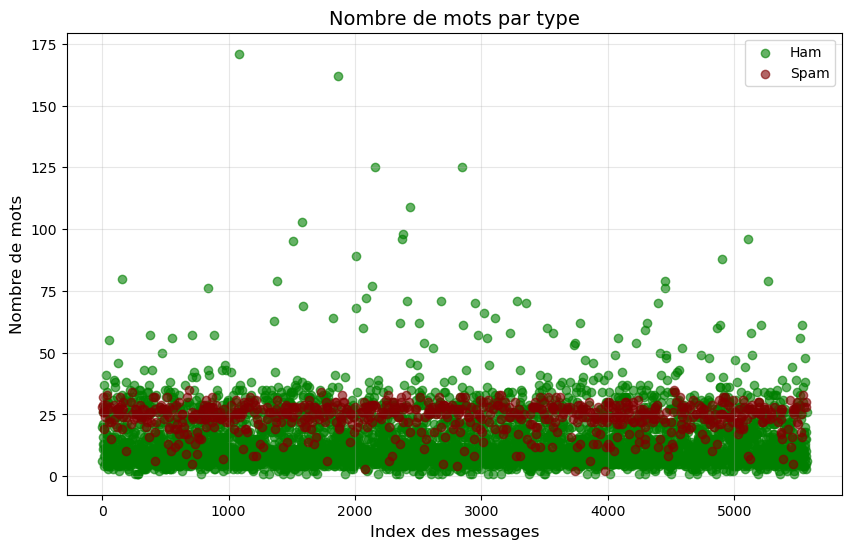

In [169]:
# Représentation sous forme de nuage de points pour observer 
# la distributivité des données selon le nombre de mots par type de message. 
hamscatterplotnbmots = df[df['type_message']=='ham']
spamscatterplotnbmots = df[df['type_message']=='spam']

plt.figure(figsize=(10, 6))
plt.scatter(hamscatterplotnbmots.index, hamscatterplotnbmots["nombre_mots"], color='green', label='Ham', alpha=0.6)
plt.scatter(spamscatterplotnbmots.index, spamscatterplotnbmots["nombre_mots"], color='maroon', label='Spam', alpha=0.6)

plt.title("Nombre de mots par type", fontsize=14)
plt.xlabel("Index des messages", fontsize=12)
plt.ylabel("Nombre de mots", fontsize=12)
plt.legend()

plt.grid(True, alpha=0.3)
plt.show()

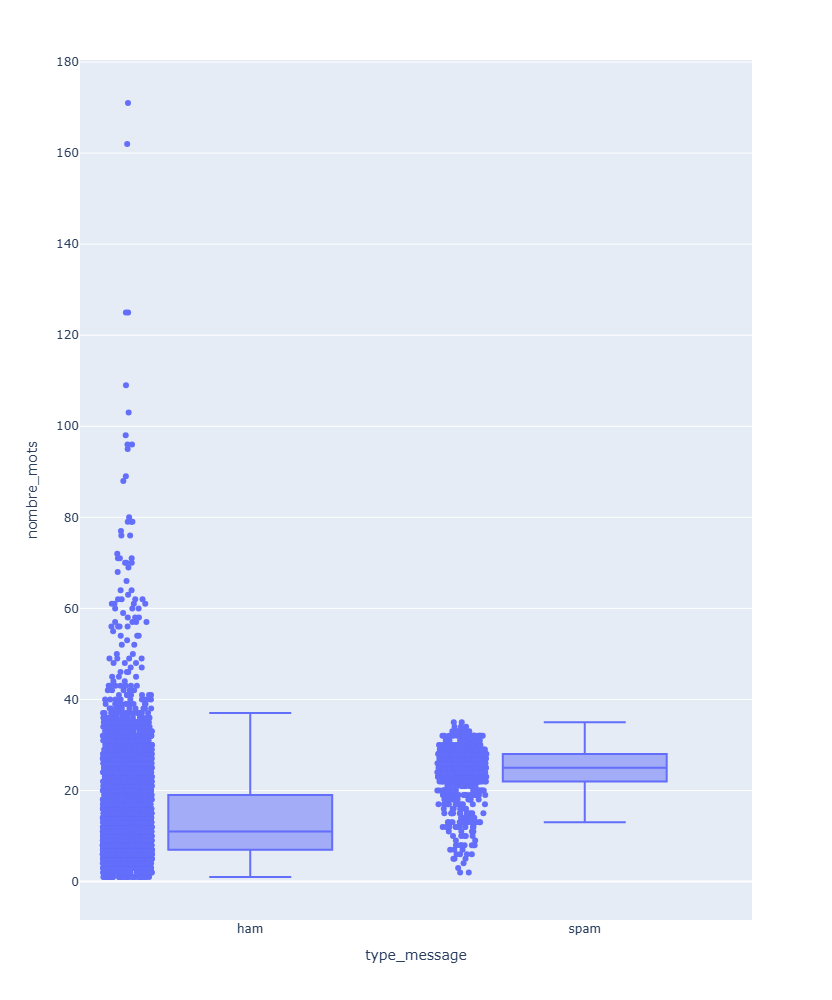

In [213]:
# Boîte à moustache pour représenter le nombre de mots par type de message. 
# Warning : Les diagrammes dynamiques ne sont pas disponible sur sur github. Veuillez ouvrir le fichier .py pour visualiser les diagrammes dynamiques. 
fig = px.box(df, x="type_message", y="nombre_mots", points = "all", width=1000, height=1000)
fig.show()

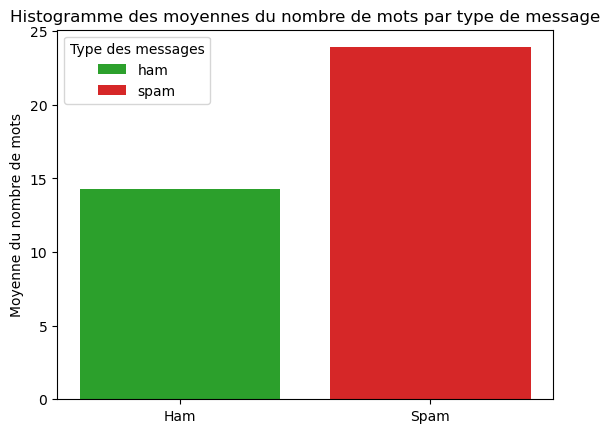

In [215]:
# Histogramme basique des moyennes du nombre de mots par type de message. 
fig, ax = plt.subplots()

Type_message = ['Ham', 'Spam']
counts = df.groupby(["type_message"])["nombre_mots"].mean()
bar_labels = ['ham', 'spam']
bar_colors = ['tab:green', 'tab:red']

ax.bar(Type_message, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Moyenne du nombre de mots')
ax.set_title('Histogramme des moyennes du nombre de mots par type de message')
ax.legend(title='Type des messages')

plt.show()

In [217]:
# Observation de la corrélation entre le nombre de mots et le nombre de caractère. 

print(f"La corrélation entre le nombre de mots et le nombre de caractère a pour résultat : {round(df["nombre_mots"].corr(df["longueur_message"]),2)}")

La corrélation entre le nombre de mots et le nombre de caractère a pour résultat : 0.97


### Nous avons donc fait le choix pour le machine learning d'ignorer la colonne nombre de mots car elle est similaire à la colonne nombre de caractère. 

## Observation de la redondance des mots selon le type de message. 

In [40]:
# Transformer le contenu des sms pour les mettre dans une liste
df["liste_mots"] = df['Contenu'].apply(lambda x: x.split())
df.head()

,type_message,Contenu,longueur_message,nombre_mots,liste_mots
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,"[Go, until, jurong, point,, crazy.., Available..."
1,ham,Ok lar... Joking wif u oni...,29,6,"[Ok, lar..., Joking, wif, u, oni...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,49,11,"[U, dun, say, so, early, hor..., U, c, already..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,"[Nah, I, don't, think, he, goes, to, usf,, he,..."


In [222]:
# Filtrer les messages de type ham et les compter
messages_ham = df[df['type_message'] == 'ham']['Contenu']
compter_mot_ham = Counter()

for message in messages_ham:
    mots = [mot for mot in message.split() if mot.isalpha()] 
    compter_mot_ham.update(mots)


# Création d'une nouvelle DataFrame afin d'y mettre les mots et la fréquence de ceux-ci. 
df_freq_mot_ham = pd.DataFrame(compter_mot_ham.items(), columns=['Mot', 'Fréquence']).sort_values(by='Fréquence', ascending=False)

df_freq_mot_ham.head(25)

,Mot,Fréquence
33,to,1538
87,you,1462
29,I,1439
83,the,1029
98,a,977
73,i,742
72,and,739
5,in,736
19,u,651
41,is,645


In [224]:
# Filtrer les messages de type 'spam'
messages_spam = df[df['type_message'] == 'spam']['Contenu']

# Compter la fréquence de chaque mot en filtrant les chiffres
compter_mot_spam = Counter()

for message in messages_spam:
    mots = [mot for mot in message.split() if mot.isalpha()]  
    compter_mot_spam.update(mots)

# Création d'une nouvelle DataFrame afin d'y mettre les mots et la fréquence de ceux-ci. 
df_freq_mot_spam = pd.DataFrame(compter_mot_spam.items(), columns=['Mot', 'Fréquence']).sort_values(by='Fréquence', ascending=False)

df_freq_mot_spam.head(25)

,Mot,Fréquence
6,to,607
3,a,360
54,your,187
57,or,185
48,call,185
62,the,178
31,for,169
29,you,164
154,is,143
68,Call,136


In [226]:
# Top 10 des mots ham
top10_mots_ham = set(df_freq_mot_ham['Mot'].head(10))

# On ne souhaite conserver que les mots qui ne sont pas présents dans les hams
mots_filtre_top10_freq_df_ham = df_freq_mot_spam[~df_freq_mot_spam['Mot'].isin(top10_mots_ham)]
mots_filtre_top10_freq_df_ham.head(10)

,Mot,Fréquence
54,your,187
57,or,185
48,call,185
31,for,169
68,Call,136
73,on,136
42,have,128
225,from,116
105,ur,107
66,with,101


In [234]:
# Téléchargement des stopwords et tokenization
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Chargement des stopwords anglais
stop_words = set(stopwords.words("english"))


# Fonction pour supprimer les stopwords, la ponctuation, les chiffres 
# et les mots de moins de 4 caractères, et retourner la fréquence des mots restants

def supp_stopwords_et_compter(text):
    if isinstance(text, str):  
        mots = word_tokenize(text) 
        mots_filtres = [
            mot for mot in mots 
            if mot.lower() not in stop_words 
            and mot not in string.punctuation 
            and mot.isalpha() 
            and len(mot) >= 3
        ]
        return mots_filtres  
    else:
        return [] 

# Appliquer la fonction à la colonne "Contenu" des messages spam pour garder tous les mots filtrés
tous_mots_filtres = df[df['type_message'] == 'spam']['Contenu'].apply(supp_stopwords_et_compter).explode()

# Compter la fréquence des mots restants
freq_mots = Counter(tous_mots_filtres)

# Créer et trier un DataFrame à partir des fréquences
df_freq_mot_spam2 = pd.DataFrame(freq_mots.items(), columns=['Mot', 'Frequence'])
df_freq_mot_spam2 = df_freq_mot_spam2.sort_values(by="Frequence", ascending=False)
df_freq_mot_spam2.head(30)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maxim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\maxim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maxim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Mot,Frequence
38,call,187
51,Call,138
53,FREE,115
43,mobile,95
37,claim,78
66,Txt,75
165,text,73
35,prize,73
13,txt,71
265,STOP,63


In [240]:
# Variable permettant de lister ce nouveau Dataframe
mot_spam_frequents = df_freq_mot_spam2["Mot"].head(20)

In [242]:
mot_spam_frequents

38        call
51        Call
53        FREE
43      mobile
37       claim
66         Txt
165       text
35       prize
13         txt
265       STOP
104       free
98       reply
176    contact
19        week
157    service
27        send
257        per
427      Nokia
226        get
343       stop
Name: Mot, dtype: object

## Ajout dans le df des mots les plus fréquents dans les spams

In [48]:
# Définition afin de permettre de compter les nombres redondants. 

def presence_redondance(texte):
    redondance = re.findall(r'\b(' + '|'.join(mot_spam_frequents) + r')\b', texte)
    return len(redondance)


df["redondance_spam"]=df["Contenu"].apply(presence_redondance)

In [244]:
# Visualisation proportion des mots spams redondants.
df.groupby(df["type_message"])["redondance_spam"].value_counts(normalize=True)


type_message  redondance_spam
ham           0                  0.838202
              1                  0.136524
              2                  0.021545
              3                  0.002900
              4                  0.000622
              6                  0.000207
spam          1                  0.266399
              2                  0.266399
              3                  0.175368
              0                  0.144578
              4                  0.065596
              5                  0.058902
              6                  0.014726
              7                  0.006693
              8                  0.001339
Name: proportion, dtype: float64

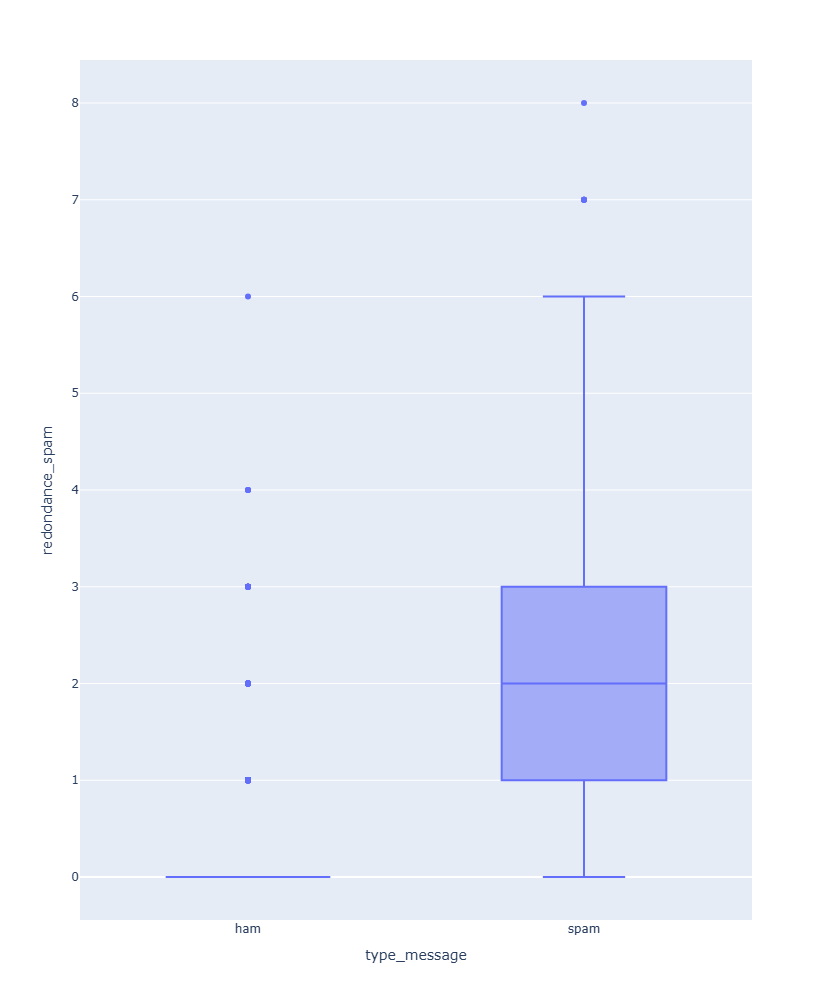

In [248]:
# Boîte à moustache permettant de visualiser la distributivité des données des mots redondants. 
# Warning : Les diagrammes dynamiques ne sont pas disponible sur sur github. Veuillez ouvrir le fichier .py pour visualiser les diagrammes dynamiques. 
fig = px.box(df, x="type_message", y="redondance_spam", width=1000, height=1000)
fig.show()

## Observation des chiffres dans les SMS

In [250]:
# Nouvelle colonne permettant de trouver les chiffres dans les SMS. 

df["chiffre_sms"]=df["Contenu"].str.contains(r'\d', regex=True)
df.head()


,type_message,Contenu,longueur_message,nombre_mots,liste_mots,redondance_spam,chiffre_sms,Tot_chiffres,caracspec_sms
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,"[Go, until, jurong, point,, crazy.., Available...",0,False,0,0
1,ham,Ok lar... Joking wif u oni...,29,6,"[Ok, lar..., Joking, wif, u, oni...]",0,False,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",1,True,25,1
3,ham,U dun say so early hor... U c already then say...,49,11,"[U, dun, say, so, early, hor..., U, c, already...",0,False,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,"[Nah, I, don't, think, he, goes, to, usf,, he,...",0,False,0,0


In [252]:
# Proportion des chiffres par type de message. 

df.groupby(df["type_message"])["chiffre_sms"].value_counts(normalize=True)


type_message  chiffre_sms
ham           False          0.843381
              True           0.156619
spam          True           0.947791
              False          0.052209
Name: proportion, dtype: float64

In [254]:
# Variable permettant de l'utiliser pour la fabrication du camembert. 

propchiffre=df.groupby(df["type_message"])["chiffre_sms"].value_counts(normalize=True)

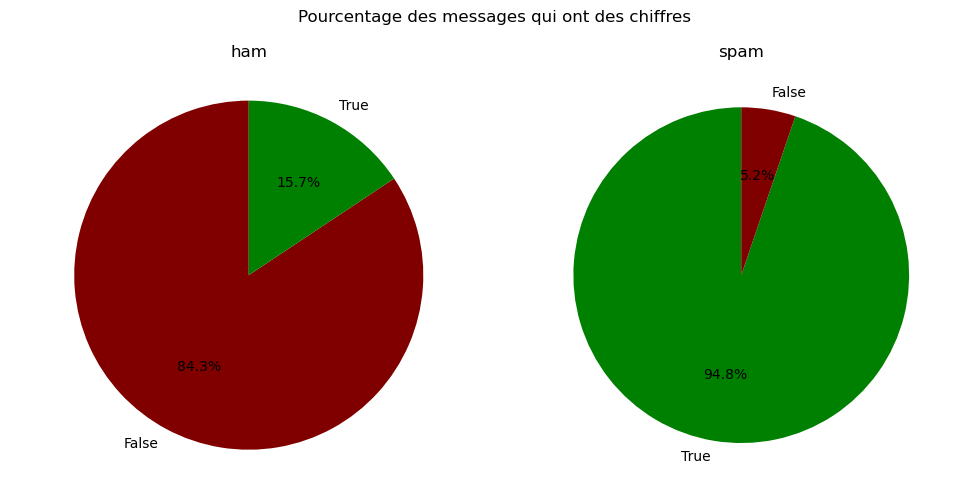

In [256]:
# Création du camembert pour visualiser les proportions des chiffres dans les messages. 

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 ligne, 2 colonnes de graphiques

# Camembert pour les messages 'ham'
axes[0].pie(propchiffre.loc['ham'].values, labels=propchiffre.loc['ham'].index, autopct='%1.1f%%', startangle=90, colors = ("maroon", "green"))
axes[0].set_title('ham')
axes[0].axis('equal')

# Camembert pour les messages 'spam'
axes[1].pie(propchiffre.loc['spam'].values, labels=propchiffre.loc['spam'].index, autopct='%1.1f%%', startangle=90, colors = ("green", "maroon"))
axes[1].set_title('spam')
axes[0].axis('equal')


fig.suptitle('Pourcentage des messages qui ont des chiffres')
# plt.tight_layout() ajuste automatiquement les sous-graphiques (axes)
# pour garantir que tous les éléments de la figure sont visibles et bien disposés
plt.tight_layout()
plt.show()

### Nous allons maintenant observer la fréquence des chiffres dans les SMS et non plus la présence de ceux-ci. 

## Observation du total des chiffres dans les SMS

In [259]:
# Définition afin de compter le nombre de chiffres par message. 

def compter_chiffres(texte):
    chiffres = re.findall(r'\d', texte)
    return len(chiffres)

# Création de la colonne permettant d'y ajouter les valeurs obtenus ci-dessus. 

df["Tot_chiffres"]=df["Contenu"].apply(compter_chiffres)

In [263]:
# Calcul de la moyenne du nombre de chiffres par message. 

df.groupby(df["type_message"])["Tot_chiffres"].mean()

type_message
ham      0.305158
spam    15.812584
Name: Tot_chiffres, dtype: float64

In [265]:
# Statistiques plus avancées sur le nombre de chiffres par message. 

df.groupby(df["type_message"])["Tot_chiffres"].describe()

,count,mean,std,min,25%,50%,75%,max
type_message,,,,,,,,
ham,4827.0,0.305158,1.072922,0.0,0.0,0.0,0.0,23.0
spam,747.0,15.812584,8.720239,0.0,10.0,16.0,22.0,47.0


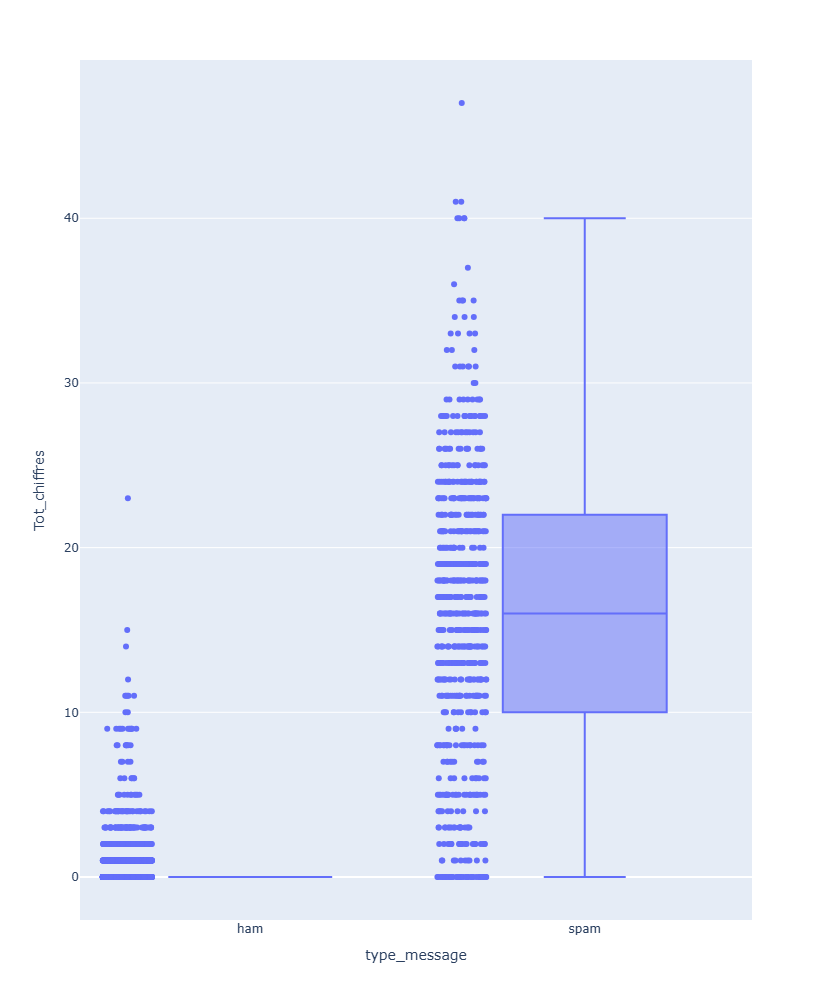

In [267]:
# Création de la boîte à moustache pour observer la distributivité des données. 
# Warning : Les diagrammes dynamiques ne sont pas disponible sur sur github. Veuillez ouvrir le fichier .py pour visualiser les diagrammes dynamiques. 
fig = px.box(df, x="type_message", y="Tot_chiffres", points = "all", width=1000, height=1000)
fig.show()

## Observation des caractères spéciaux dans les SMS

In [64]:
# Définition des caractères spéciaux retenus

def caracspec(text):
    caraspe = re.findall(r'[^a-zA-Z0-9\s!"\'(),-.:;?]', text)
    return len(caraspe)

In [65]:
#Création de la nouvelle colonne avec ses caractéristiques. 

df["caracspec_sms"]=df["Contenu"].apply(caracspec)

In [271]:
# Calcul de la moyenne du nombre de caractères spéciaux par message. 

df.groupby(df["type_message"])["caracspec_sms"].describe()

,count,mean,std,min,25%,50%,75%,max
type_message,,,,,,,,
ham,4827.0,0.357986,1.375094,0.0,0.0,0.0,0.0,54.0
spam,747.0,1.613119,1.862999,0.0,0.0,1.0,2.0,19.0


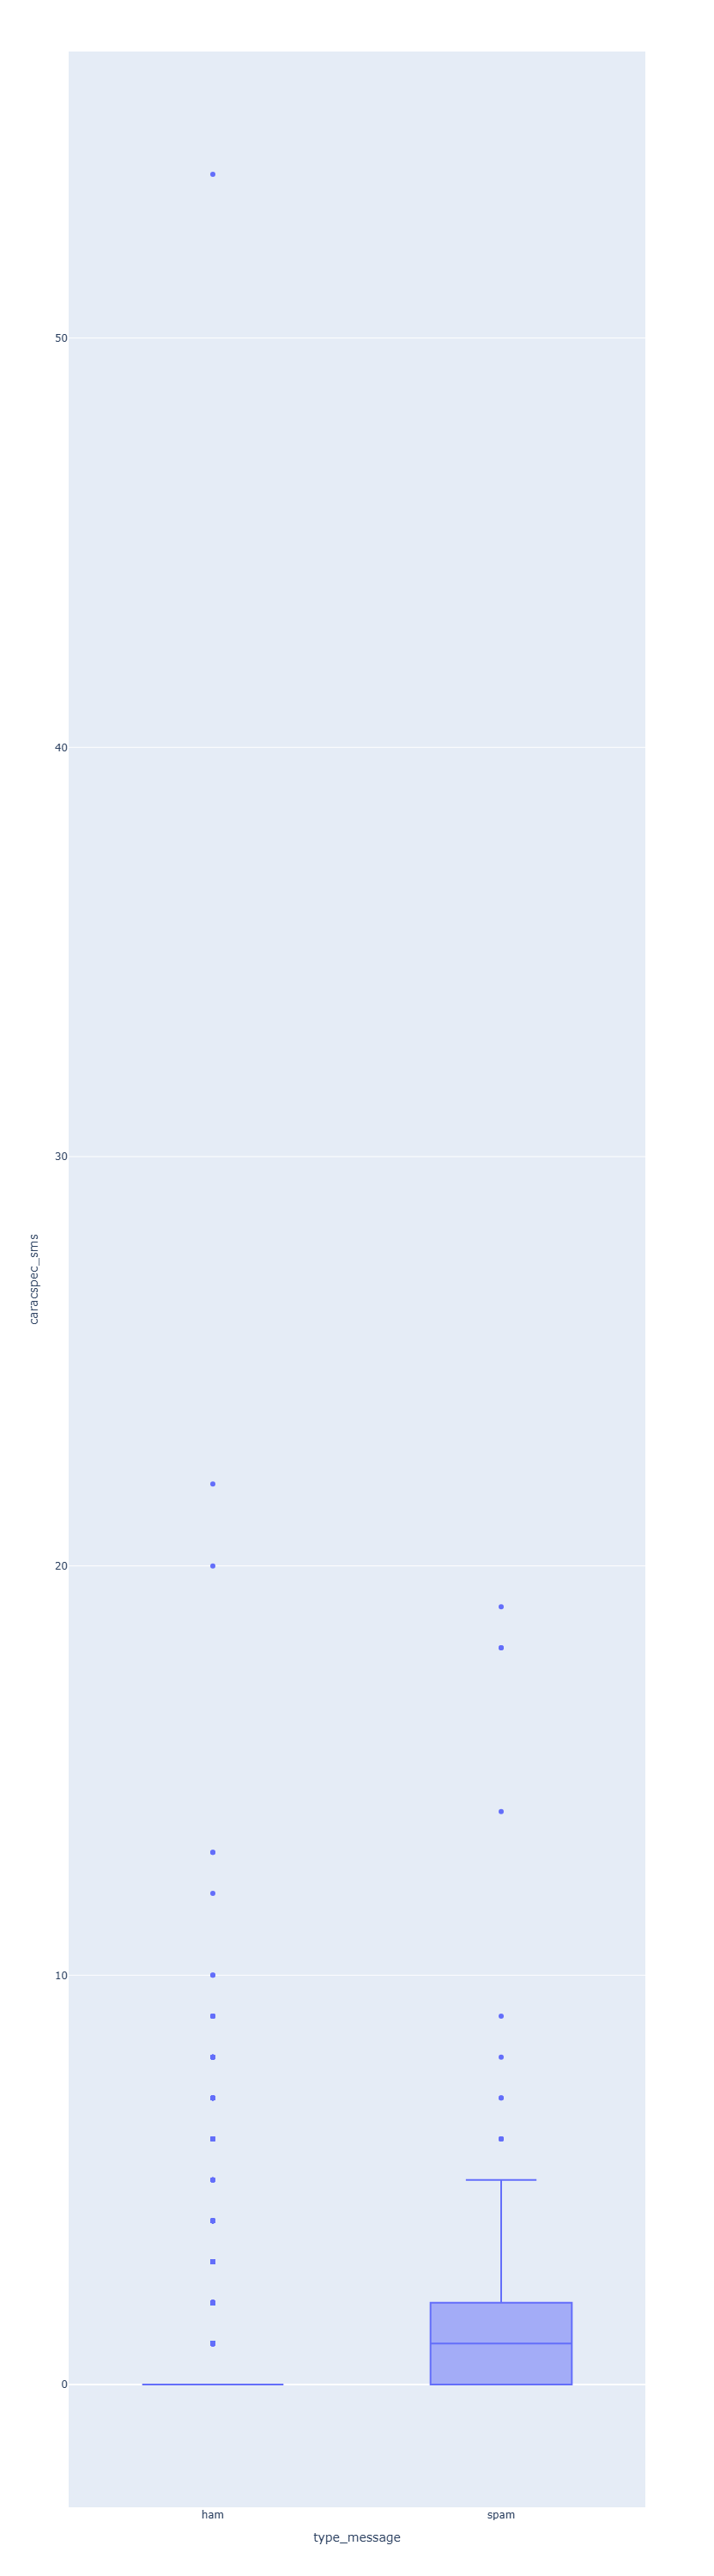

In [273]:
# Création de la boîte à moustache selon le type de messages et le nombre de caractères spéciaux. 
# Warning : Les diagrammes dynamiques ne sont pas disponible sur sur github. Veuillez ouvrir le fichier .py pour visualiser les diagrammes dynamiques. 
fig = px.box(df, x="type_message", y="caracspec_sms", width=1000, height=3000)
fig.show()

## Observation de la distributivité des données pour le choix du modèle de normalisation

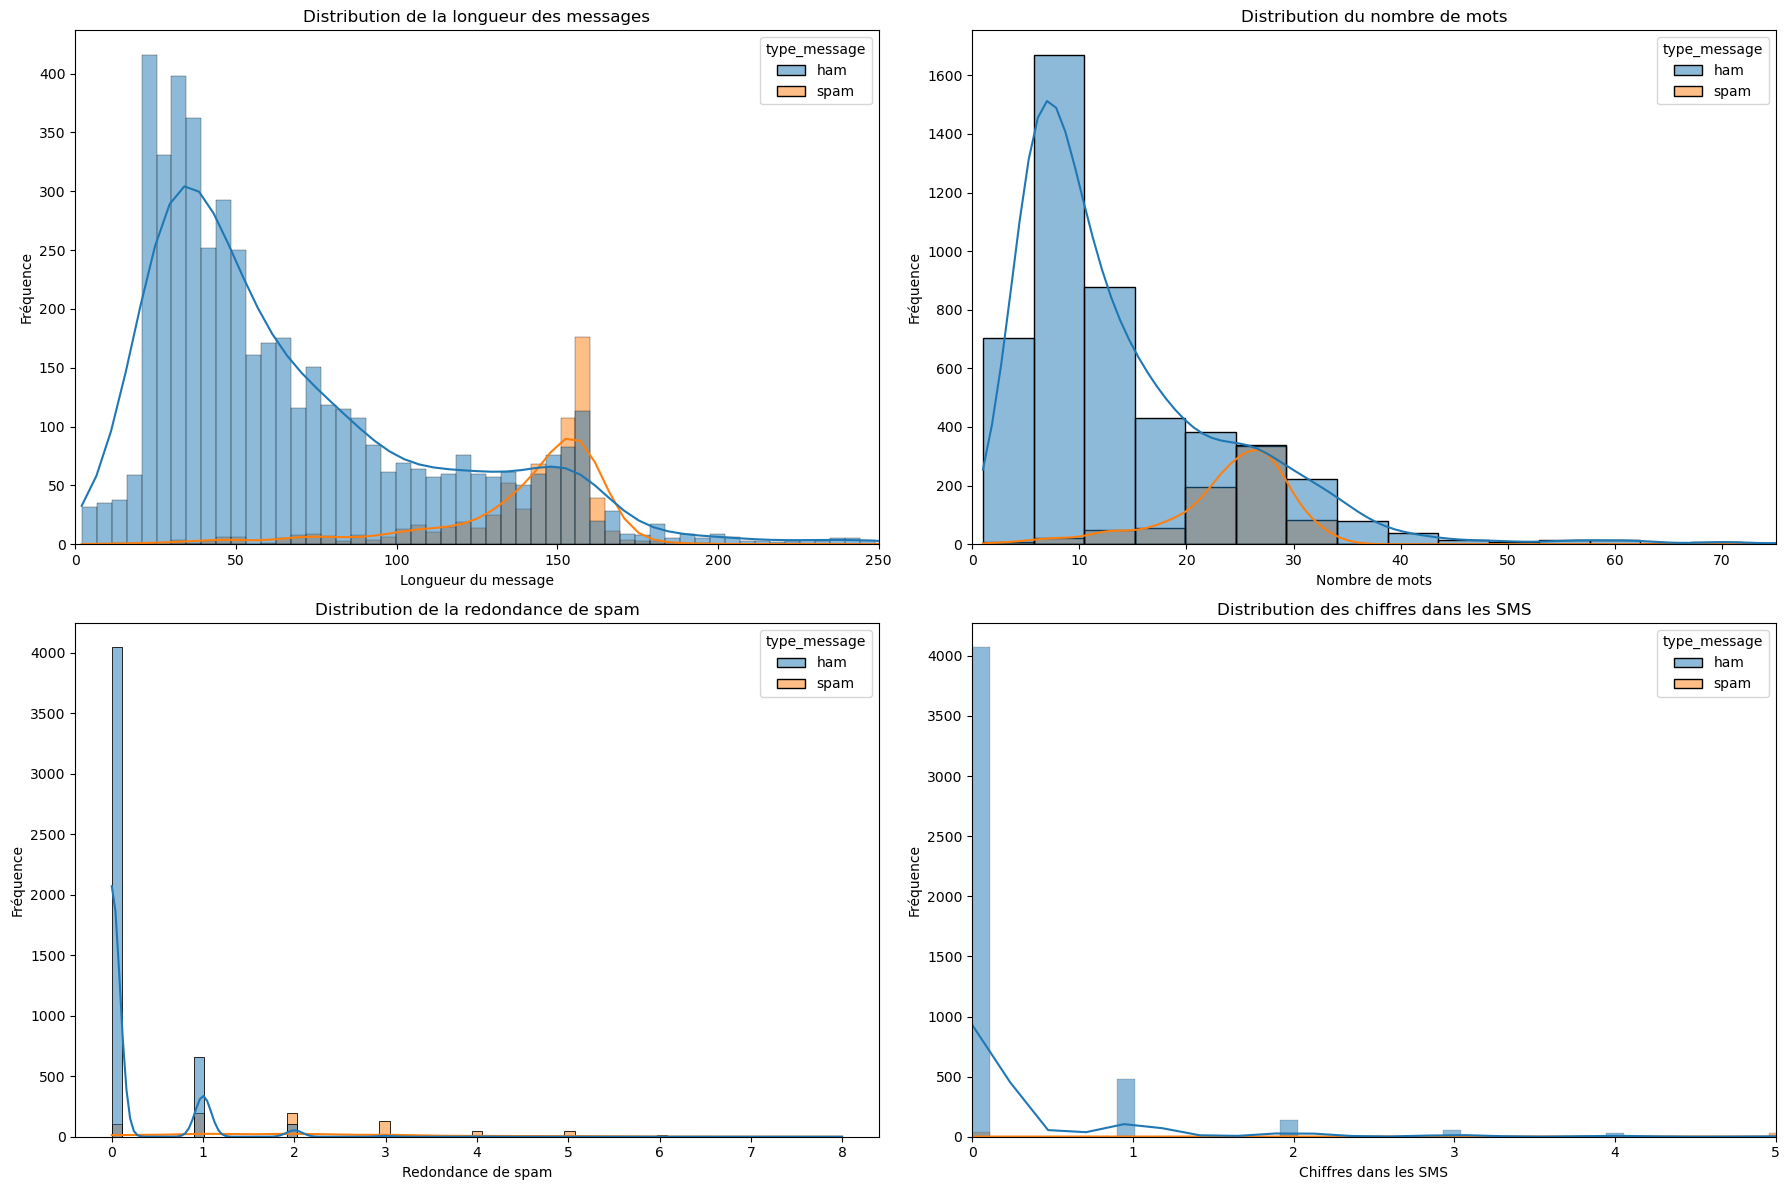

In [276]:
# 4 histogrammes selon les caractéristiques retenus pour nos modèles de Machine Learning. 

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Histogramme pour longueur_message
sns.histplot(data=df, x="longueur_message", hue="type_message", kde=True, ax=axes[0, 0], bins=195)
axes[0, 0].set_title('Distribution de la longueur des messages')
axes[0, 0].set_xlabel('Longueur du message')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].set_xlim(0, 250)

# Histogramme pour nombre_mots
sns.histplot(data=df, x='nombre_mots', hue="type_message", kde=True, ax=axes[0, 1], bins= 36)
axes[0, 1].set_title('Distribution du nombre de mots')
axes[0, 1].set_xlabel('Nombre de mots')
axes[0, 1].set_ylabel('Fréquence')
axes[0, 1].set_xlim(0, 75)

# Histogramme pour redondance_spam
sns.histplot(data=df, x='redondance_spam', hue="type_message", kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution de la redondance de spam')
axes[1, 0].set_xlabel('Redondance de spam')
axes[1, 0].set_ylabel('Fréquence')


# Histogramme pour chiffre_sms
sns.histplot(data=df ,x='Tot_chiffres', hue="type_message", kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution des chiffres dans les SMS')
axes[1, 1].set_xlabel('Chiffres dans les SMS')
axes[1, 1].set_ylabel('Fréquence')
axes[1, 1].set_xlim(0, 5)

plt.tight_layout()
plt.show()

# Machine learning

## Sélection des caractéristiques utilisées

In [278]:
# On a conservé les 4 caractéristiques suivantes : 
# - Longueur des messages par caractères
# - Les caractères spéciaux 
# - Le total de chiffres par message
# - Le total de mots présents fréquemment dans les spams par message

X = df[["longueur_message", "caracspec_sms", "Tot_chiffres", "redondance_spam"]]
y= df['type_message']

In [280]:
# train test selon les modèles : 

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, stratify = y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, stratify = y)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, stratify = y)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.3, stratify = y)

## Création de la pipeline

In [283]:
# définition de la pipeline utilisée

def creation_pipeline(model):
    global scaler
    return Pipeline(steps=[
                       ('scaling', scaler),
                       ('modelisation', model)])

In [75]:
#normalisation des données

scaler = StandardScaler()


#Modèle utilisé

model1 = SVC(probability=True)
model2 = LogisticRegression()
model3 = GaussianNB()
model4 = RandomForestClassifier()

#modèle SVC
pipe1 = creation_pipeline(model1)
fit1 = pipe1.fit(X_train1, y_train1)
y_pred1 = pipe1.predict(X_test1)
Matrice_confusion_SVC= ConfusionMatrixDisplay.from_estimator(pipe1, X_test1, y_test1)
plt.close()

#modèle de régression logistique
pipe2 = creation_pipeline(model2)
fit2 = pipe2.fit(X_train2, y_train2)
y_pred2 = pipe2.predict(X_test2)
Matrice_confusion_logistic= ConfusionMatrixDisplay.from_estimator(pipe2, X_test2, y_test2)
plt.close()

#modèle de Naive Bayes Gaussien
pipe3 = creation_pipeline(model3)
fit3 = pipe3.fit(X_train3, y_train3)
y_pred3 = pipe3.predict(X_test3)
Matrice_confusion_bayes= ConfusionMatrixDisplay.from_estimator(pipe3, X_test3, y_test3)
plt.close()

#modèle de classification Random Forest
pipe4 = creation_pipeline(model4)
fit4 = pipe4.fit(X_train4, y_train4)
y_pred4 = pipe4.predict(X_test4)
Matrice_confusion_forest= ConfusionMatrixDisplay.from_estimator(pipe4, X_test4, y_test4)
plt.close()

In [76]:
# définir le roc pour pouvoir l'implémenter derrière à chaque modèle. 

def plot_roc_curve(model, X_test, y_test, label):
    """Affiche la courbe ROC pour un modèle donné"""
    y_score = model.predict_proba(X_test)[:, 1]  
    fpr, tpr, _ = roc_curve(y_test, y_score, pos_label='spam') 
    ResultInt= roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, label=f'{label}, AU={ResultInt:.2f} ')
    plt.plot([0, 1], [0, 1], 'k--', label='Random') 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

## Sélection du modèle

In [78]:
output = widgets.Output()

def on_dropdown_change(change):
    with output:
        output.clear_output(wait=True)
        if change['type'] == 'change' and change['name'] == 'value':
            if change['new'] == '1':
                result = pipe1
                result3 = fit1
                display(result)  
                result2 = print(f" Le résultat de fiabilité de notre modèle de machine learning est de : {round(pipe1.score(X_test1, y_test1)*100,2)} %\n")
                print("Voici la matrice de confusion pour le modèle SVC \n")
                Matrice_confusion_SVC.plot()
                plt.show()
                print("\n Voici le tableau des scores de la matrice SVC : \n ")
                print(classification_report(y_test1, y_pred1))
                plot_roc_curve(pipe1, X_test1, y_test1, label="SVC")
            elif change['new'] == '2':
                result = pipe2
                result3 = fit2
                display(result)  
                result2 = print(f" Le résultat de fiabilité de notre modèle de machine learning est de : {round(pipe2.score(X_test2, y_test2)*100,2)} %\n")
                print("Voici la matrice de confusion pour le modèle de régression logistique \n")
                Matrice_confusion_logistic.plot()
                plt.show()
                print("\n Voici le tableau des scores de la matrice de régression logistique : \n ")
                print(classification_report(y_test2, y_pred2))
                plot_roc_curve(pipe2, X_test2, y_test2, label="Régression logistique")
            elif change['new'] == '3':
                result = pipe3
                result3 = fit3
                display(result)  
                result2 = print(f" Le résultat de fiabilité de notre modèle de machine learning est de : {round(pipe3.score(X_test3, y_test3)*100,2)} %\n")
                print("Voici la matrice de confusion pour le modèle de Naive Bayes Gaussien \n")
                Matrice_confusion_bayes.plot()
                plt.show()
                print("\n Voici le tableau des scores de la matrice de Naive Bayes Gaussien : \n ")
                print(classification_report(y_test3, y_pred3))
                plot_roc_curve(pipe3, X_test3, y_test3, label="Naive Bayes Gaussien")
            elif change['new'] == '4' : 
                result = pipe4
                result3 = fit4
                display(result)  
                result2 = print(f" Le résultat de fiabilité de notre modèle de machine learning est de : {round(pipe4.score(X_test4, y_test4)*100,2)} %\n")
                print("Voici la matrice de confusion pour le modèle Random Forest Classifier \n")
                Matrice_confusion_forest.plot()
                plt.show()
                print("\n Voici le tableau des scores de la matrice Random Forest Classifier: \n ")
                print(classification_report(y_test4, y_pred4))
                print("\nCourbe ROC pour le modèle Random Forest Classifier :\n")
                plot_roc_curve(pipe4, X_test4, y_test4, label="Random Forest Classifier")

dropdown = widgets.Dropdown(
    options=[
        ('Modèle SVC', '1'),
        ('Modèle de régression logistique', '2'),
        ('Modèle de Naive Bayes Gaussien ', '3'),
        ('Modèle Random Forest de classification', '4')
    ],
    value='1',  # Valeur initiale
    description='modèle choisi:',
    disabled=False,
)

dropdown.observe(on_dropdown_change)
display(dropdown, output)



Dropdown(description='modèle choisi:', options=(('Modèle SVC', '1'), ('Modèle de régression logistique', '2'),…

Output()